# An analysis of paleo-present climate data

In [1]:
#importing standard libraries to use in the tasks
#Numerical arrays and random numbers
import numpy as np
#plotting charts
import matplotlib.pyplot as plt
#to use datasets
import pandas as pd
#for graphing
import seaborn as sns
import csv

**CO2 data**

"The overwhelming realization that anthropogenic climate change is a reality has focused the attention of the scientific community, policymakers and the general public on the rising atmospheric concentrations of the main greenhouse gases, carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O). The Global Carbon Project (GCP) has approached this challenge by focusing comprehensively on the global biogeochemical cycles which govern these three greenhouse gases, including their natural and human drivers, and opportunities for low carbon pathways." https://www.globalcarbonproject.org/about/index.htm


We start by reading the data from the file using sheet 1 (all records). We skip the first 6 rows as they contain information about the data

In [2]:
df_all_records = pd.read_excel('data/CO2 data.xlsx', sheet_name=1, skiprows=6)
df_all_records.head()

,Depth (m),"Gasage (EDC3, yr BP)","Gasage (AICC2012, yr BP)",CO2 (ppmv),sigma mean CO2 (ppmv),Depth (m).1,"Gasage (EDC3, yr BP).1","Gasage (AICC2012, yr BP).1",CO2 (ppmv).1,Depth (m).2,...,"Gasage (WDC06A-7, yr BP).1",CO2 (ppmv).19,sigma mean CO2 (ppmv).16,Depth (m).19,"Gasage (AICC2012, yr BP).13",corrected CO2 (ppmv),analytical sigma mean CO2 (ppmv),Correcting Factor (ppmv),lower bound (2 sigma) of correction F. (ppmv),upper bound (2 sigma) of correction F. (ppmv)
0,102.83,137.0,350.110103,280.4,1.8,149.1,2690.0,NaN,284.7,380.82,...,8893.213,267.902828,3.369565,2950.5275,562654.671212,234.065089,0.938515,0.0,0.0,0.45076
1,106.89,268.0,486.693200,274.9,0.7,173.1,3897.0,3661.9285,272.7,382.42,...,8985.488,265.447325,1.429392,2951.8225,563135.783333,240.114724,2.126252,0.0,0.0,0.49078
2,107.20,279.0,501.195000,277.9,0.7,177.4,4124.0,3746.6270,268.1,382.76,...,9080.986,268.861214,1.418332,2952.9225,563536.650000,242.288114,0.513847,0.0,0.0,0.52478
3,110.25,395.0,539.649455,279.1,1.3,228.6,6735.0,6449.1760,262.2,383.54,...,9176.945,263.952432,1.853741,2954.0225,563928.766667,245.694323,1.769919,0.0,0.0,0.55879
4,110.50,404.0,539.894909,281.9,1.1,250.3,7873.0,7567.3510,254.5,385.33,...,9274.864,270.597511,3.848356,2955.1225,564311.433333,245.812943,0.493195,0.0,0.0,0.59281


In [6]:
#get two columns from the dataframe ref: https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
columns = ['Gasage (AICC2012, yr BP)', 'CO2 (ppmv)']
df_aicc2012 = pd.DataFrame(df_all_records, columns=columns)
df_aicc2012.head()

,"Gasage (AICC2012, yr BP)",CO2 (ppmv)
0,350.110103,280.4
1,486.693200,274.9
2,501.195000,277.9
3,539.649455,279.1
4,539.894909,281.9


Now we can also read in the data from the file using sheet 2 (CO2 Composite). We skip the first 14 rows as they contain information about the data

In [9]:
df_CO2_composite = pd.read_excel('data/CO2 data.xlsx', sheet_name=2, skiprows=14)
df_CO2_composite.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


Using just the composite data, we start by renaming the headers of the columns in the dataframe, this is for ease of further work, and also, as the Gasage column header has an annoying trailing space which is easily missed. This will help to make all the headers easier to view.

In [10]:
df_CO2_composite.rename(columns={'Gasage (yr BP) ': 'Gasage', 'CO2 (ppmv)': 'CO2', 'sigma mean CO2 (ppmv)': 'Mean'}, inplace=True)
df_CO2_composite.head()

,Gasage,CO2,Mean
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


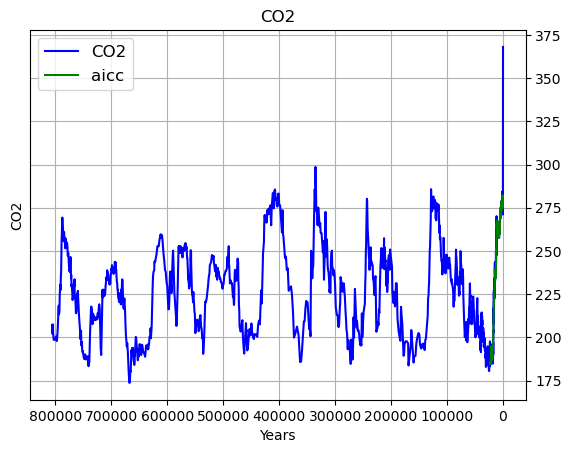

In [15]:
fig, ax = plt.subplots()
df_CO2_composite.plot(x = "Gasage", y = "CO2", ax=ax, label='CO2',color='blue')
df_aicc2012.plot(x = "Gasage (AICC2012, yr BP)", y = "CO2 (ppmv)", ax=ax, label='aicc',color='green')
#df_aicc2012  Gasage (AICC2012, yr BP)	CO2 (ppmv)
#ax.plot(CO2_luthi_comp['EDC3_gas_a (yr)'], CO2_luthi_comp['CO2 (ppmv)'], label='Luthi CO2 record')
ax.invert_xaxis()
ax.yaxis.tick_right()
ax.legend(loc='upper left', fontsize=12)
plt.title("CO2")
plt.xlabel("Years")
plt.ylabel("CO2")
plt.grid(True)
plt.savefig('img/CO2.png') 
plt.show()


**Temperature data**

In [ ]:
df_temperature = pd.read_excel('data/Temp data.xls')

df_temperature.head()

In [ ]:
# read in temperature data from Dome C text file. Using the separator s+ to ensure correct spacing as there is more than one whitespace
# and skiprows to ignore the first 91 lines of text ref: https://stackoverflow.com/questions/22809061/read-space-separated-data-with-pandas
df_domeC_Temp = pd.read_csv('data/domeC.txt', sep='\s+', skiprows=91)
df_domeC_Temp.describe()


In [ ]:
# Remove 3 columns of data that isn't relevant
df_domeC_Temp=df_domeC_Temp.drop(["Bag","ztop","Deuterium"],axis=1) 
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# remove cells with NaN - not a number ref: https://www.w3schools.com/python/pandas/ref_df_dropna.asp
df_domeC_Temp=df_domeC_Temp.dropna()
df_domeC_Temp.head()


In [ ]:
#The index is now starting at 12 instead of 0, we can reset it ref:https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
df_domeC_Temp = df_domeC_Temp.reset_index(drop=True) 
df_domeC_Temp.head()

In [ ]:
df_domeC_Temp.to_csv('data/domeC.csv', index = None)